In [ ]:
# Characterisation can be done by changing settings to qibolab/runcards/tiiq.yml and examples/tii/diagnostics.yml
# These scripts do not save the characterisation results to the runcard; to do so use save_config_parameter:
#   ds.backup_config_file()
#   resonator_freq, avg_min_voltage, max_ro_voltage, smooth_dataset, dataset = ds.run_resonator_spectroscopy()
#   ds.save_config_parameter('resonator_freq', resonator_freq, 'characterization', 'single_qubit', qubit)

In [1]:
from qibolab.paths import script_folder
from qibolab import Platform
from qibolab.calibration import utils
from qibolab.calibration.calibration import Calibration as Diagnostics

diagnostics_settings = script_folder / "diagnostics.yml"

# Create a platform; connect and configure it
platform = Platform('tiiq')
platform.connect()
platform.setup()

# create a diagnostics/calibration object
ds = Diagnostics(platform, diagnostics_settings)

# select the qubit to be characterised
qubit = 0


[Qibo 0.1.8.dev2|INFO|2022-07-29 17:42:13]: Loading platform tiiq from runcard d:\alvaro\projects\github\qibolab\src\qibolab\runcards\tiiq.yml
[Qibo 0.1.8.dev2|INFO|2022-07-29 17:42:13]: Connecting to tiiq instrument qrm_rf.
[Qibo 0.1.8.dev2|INFO|2022-07-29 17:42:15]: Connecting to tiiq instrument qcm_rf1.
[Qibo 0.1.8.dev2|INFO|2022-07-29 17:42:20]: Creating MeasurementControl Calibration


In [ ]:
ds.backup_config_file()

Resonator Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     30s | time left:      0s  
100% completed | elapsed time:     30s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:     23s | time left:      0s  
100% completed | elapsed time:     23s | time left:      0s  7804819841
0.00026216521870500584
1900000
5789.580671296899


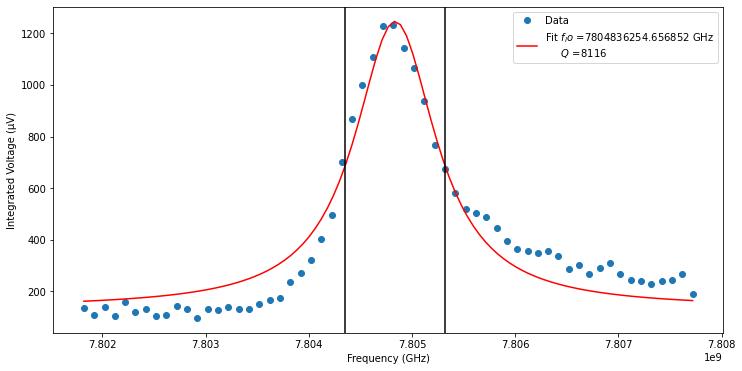


Resonator Frequency = 7824836254


In [2]:
resonator_freq, avg_voltage, peak_voltage, dataset = ds.run_resonator_spectroscopy(qubit)

In [3]:
print(f"Average voltage: {int(avg_voltage)}")
print(f"Peak voltage: {int(peak_voltage)}")
print(f"Resonator frequency: {resonator_freq}")
print(f"qrm_rf out0_in0_lo_freq: {resonator_freq - platform.settings['native_gates']['single_qubit'][qubit]['MZ']['frequency']}")


Average voltage: 257
Peak voltage: 1245
Resonator frequency: 7824836254
qrm_rf out0_in0_lo_freq: 7804836254


In [ ]:
ds.save_config_parameter("resonator_freq", resonator_freq, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("resonator_spectroscopy_avg_ro_voltage", int(avg_voltage), 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("resonator_spectroscopy_peak_ro_voltage", int(peak_voltage), 'characterization', 'single_qubit', qubit)
lo_qrm_frequency = int(resonator_freq - platform.settings['native_gates']['single_qubit'][qubit]['MZ']['frequency'])
ds.save_config_parameter("out0_in0_lo_freq", lo_qrm_frequency, 'instruments', platform.qrm[qubit].name, 'settings')

Resonator Punchout

In [ ]:
dataset = ds.run_resonator_punchout(qubit)

Resonator Spectroscopy Flux

In [ ]:
dataset = ds.run_resonator_punchout(qubit, fluxline = 0)

Qubit Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     17s | time left:      0s  
100% completed | elapsed time:     17s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:     20s | time left:      0s  
100% completed | elapsed time:     20s | time left:      0s  5282313723
0.0008227608412159302
340000
-165.7143778259518


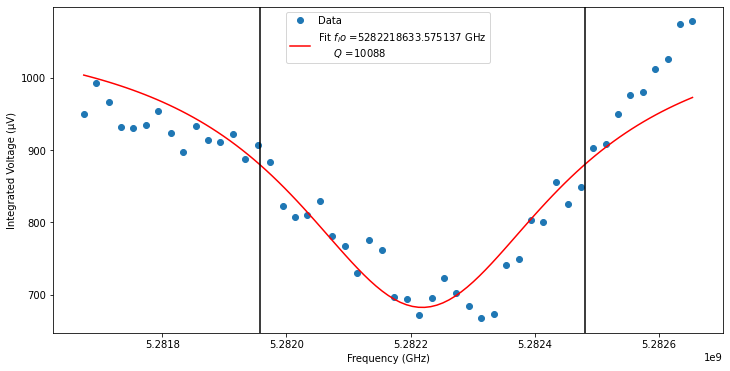


Qubit Frequency = 5082218633


In [4]:
qubit_freq, avg_voltage, peak_voltage, dataset = ds.run_qubit_spectroscopy(qubit)

In [8]:
print(f"Average voltage: {int(avg_voltage)}")
print(f"Peak voltage: {int(peak_voltage)}")
print(f"Qubit frequency: {qubit_freq}")
print(f"qcm_rf1 out0_in0_lo_freq: {qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency']}")

Average voltage: 1143
Peak voltage: 0
Qubit frequency: 5282268022291834880
qcm_rf1 out0_in0_lo_freq: 5282268022491834880


In [ ]:
ds.save_config_parameter("qubit_freq", qubit_freq, 'characterization', 'single_qubit', qubit)
lo_qcm_frequency = int(qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
ds.save_config_parameter("qubit_spectroscopy_peak_ro_voltage", float(peak_voltage), 'characterization', 'single_qubit', qubit)

Rabi Oscillations with varying pulse length

Starting iterative measurement...
100% completed | elapsed time:    292s | time left:      0s  
100% completed | elapsed time:    292s | time left:      0s  
Pi pulse duration = 153.45078868970776

Pi pulse amplitude = 0.9

rabi oscillation peak voltage = 463


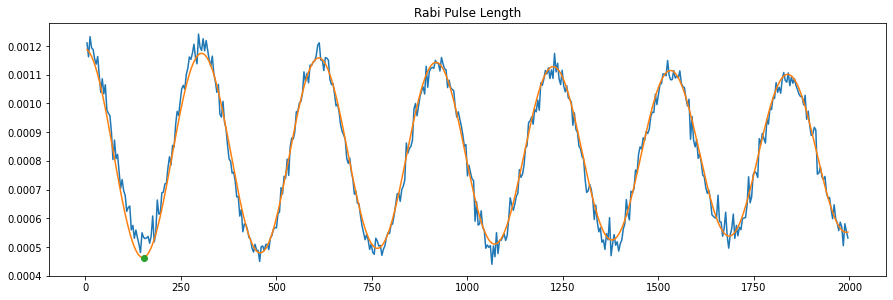

In [6]:
pi_pulse_duration, pi_pulse_amplitude, rabi_oscillations_pi_pulse_peak_ro_voltage, dataset = ds.run_rabi_pulse_length(qubit)

In [7]:
print(f"Pi pulse duration: {pi_pulse_duration}")
print(f"Pi pulse amplitude: {pi_pulse_amplitude}")
print(f"Rabi Oscillation pi pulse peak voltage: {rabi_oscillations_pi_pulse_peak_ro_voltage}")

Pi pulse duration: 153.45078868970776
Pi pulse amplitude: 0.9
Rabi Oscillation pi pulse peak voltage: 463


In [ ]:
ds.save_config_parameter("duration", int(pi_pulse_duration), 'native_gates', 'single_qubit', qubit, 'RX')
ds.save_config_parameter("amplitude", float(pi_pulse_amplitude), 'native_gates', 'single_qubit', qubit, 'RX')
ds.save_config_parameter("rabi_oscillations_pi_pulse_peak_ro_voltage", float(rabi_oscillations_pi_pulse_peak_ro_voltage), 'characterization', 'single_qubit', qubit)

Rabi Oscillations with varying pulse gain

In [ ]:
pi_pulse_gain, pi_pulse_amplitude, rabi_oscillations_pi_pulse_peak_voltage, dataset = ds.run_rabi_pulse_gain(qubit)

In [13]:
dataset['x0'].values[dataset['y0'].argmin().values]

0.2850000000000001

In [13]:
print(f"Pi pulse gain: {pi_pulse_gain}")
print(f"Pi pulse amplitude: {pi_pulse_amplitude}")
print(f"Rabi Oscillation pi pulse peak voltage: {rabi_oscillations_pi_pulse_peak_ro_voltage}")

Pi pulse gain: 0.23819567784402343
Pi pulse amplitude: 0.9
Rabi Oscillation pi pulse peak voltage: 497


T1

Starting iterative measurement...
100% completed | elapsed time:    370s | time left:      0s  
100% completed | elapsed time:    370s | time left:      0s  
T1 = 18180


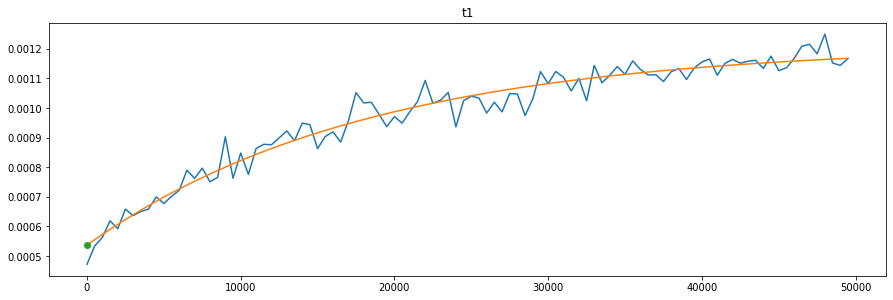

In [9]:
t1, dataset = ds.run_t1(qubit)

In [12]:
print(f"T1: {t1}")

T1: 18180


In [ ]:
ds.save_config_parameter("T1", float(t1), 'characterization', 'single_qubit', qubit)

Ramsey

Starting iterative measurement...
100% completed | elapsed time:    155s | time left:      0s  
100% completed | elapsed time:    155s | time left:      0s  
Delta Frequency = 1000959.8727051467

Corrected Qubit Frequency = 5082174682

T2 = 5352.3059789872195 ns


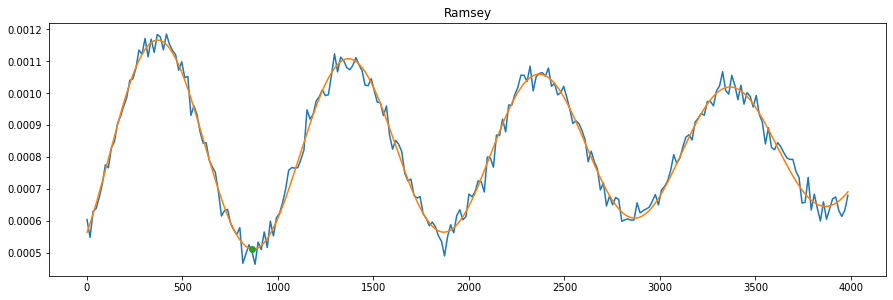

In [2]:
delta_frequency, corrected_qubit_frequency, t2, smooth_dataset, dataset = ds.run_ramsey(qubit)

In [17]:
print(f"Delta Frequency: {delta_frequency}")
print(f"Corrected qubit frequency: {corrected_qubit_frequency}")
print(f"T2: {t2}")

Delta Frequency: 1006614.4855342672
Corrected qubit frequency: 5080167108
T2: 3240.517416613314


In [ ]:
#adjusted_qubit_freq = int(platform.settings['characterization']['single_qubit'][qubit]['qubit_freq'] + delta_frequency)
ds.save_config_parameter("qubit_freq", corrected_qubit_frequency, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("T2", float(t2), 'characterization', 'single_qubit', qubit)
RX_pulse_sequence = platform.settings['native_gates']['single_qubit'][qubit]['RX']['pulse_sequence']
lo_qcm_frequency = int(corrected_qubit_frequency + RX_pulse_sequence[0]['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
print(corrected_qubit_frequency)

Ramsey freq

In [5]:
t2, delta_phys, corrected_qubit_freq, smooth_dataset, dataset = ds.run_ramsey_freq(qubit)

Starting iterative measurement...
100% completed | elapsed time:     82s | time left:      0s  
100% completed | elapsed time:     82s | time left:      0s  

In [6]:
corrected_qubit_freq = int(platform.settings['characterization']['single_qubit'][qubit]['qubit_freq'] - delta_phys)
print(f"Delta Frequency: {delta_phys}")
print(f"Corrected qubit frequency: {corrected_qubit_freq}")
lo_qcm_frequency = corrected_qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency']
print(f"Corrected out0_lo_freq: {lo_qcm_frequency}")
print(f"T2: {t2}")

Delta Frequency: -1271.5107130934484
Corrected qubit frequency: 5082174994
Corrected out0_lo_freq: 5282174994
T2: 5590.0961825947015


In [ ]:
ds.save_config_parameter("qubit_freq", corrected_qubit_freq, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("T2", float(t2), 'characterization', 'single_qubit', qubit)
lo_qcm_frequency = int(corrected_qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
print(corrected_qubit_freq)

allXY

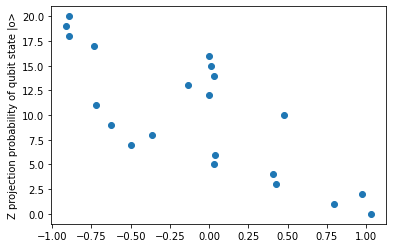

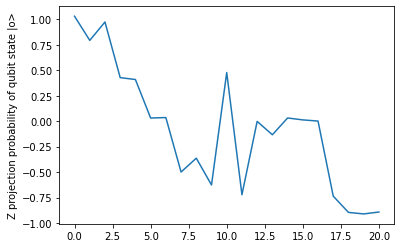

In [20]:
results, gateNumber = ds.allXY(qubit)

import matplotlib.pyplot as plt

plt.scatter(results, gateNumber)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

plt.plot(results)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

#TODO: for consistency move all plotting inside the function

            ["I","I"], 

            ["RX(pi)","RX(pi)"],
            ["RY(pi)","RY(pi)"],    
            ["RX(pi)","RY(pi)"],        
            ["RY(pi)","RX(pi)"],

            ["RX(pi/2)","I"],        
            ["RY(pi/2)","I"],            
            
            ["RX(pi/2)","RY(pi/2)"],            
            ["RX(pi/2)","RY(pi/2)"],                
            
            ["RX(pi/2)","RY(pi)"],                
            ["RY(pi/2)","RX(pi)"],                

            ["RX(pi)","RY(pi/2)"],                
            ["RX(pi)","RX(pi/2)"],                
            
            ["RX(pi/2)","RX(pi)"],                            
            ["RX(pi)","RX(pi/2)"],                
            ["RY(pi/2)","RY(pi)"],                
            ["RY(pi)","RY(pi/2)"],                
            
            ["RX(pi)","I"],  
            ["RY(pi)","I"],           
                 
            ["RX(pi/2)","RX(pi/2)"],                
            ["RY(pi/2)","RY(pi/2)"]    

Drag Pulse Beta Parameter Tunning

In [2]:
beta_optimal = ds.run_drag_pulse_tunning(qubit)

['-1.0']


TypeError: Drag.__init__() missing 1 required positional argument: 'beta'

In [ ]:
print(f"Beta optimal: {beta_optimal}")
print(f"Drag Shape: Drag(5, {beta_optimal})")

In [4]:
beta= -1.1
qd_duration = platform.settings['native_gates']['single_qubit'][qubit]['RX']['duration'] 
qd_frequency = platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency']
qd_amplitude = platform.settings['native_gates']['single_qubit'][qubit]['RX']['amplitude'] / 2
qd_shape = platform.settings['native_gates']['single_qubit'][qubit]['RX']['drag_shape']
#TODO: Replace with drag shape stored in Runcard when c
if (beta != None):
    qd_shape = 'Drag(5,'+ str(beta)+')'        
        
qd_channel = platform.settings['qubit_channel_map'][qubit][1]
print (qd_duration)
print (qd_frequency)
print (qd_amplitude)
print (qd_shape)

from qibolab.pulses import Pulse
drag = Pulse(0, qd_duration, qd_amplitude, qd_frequency, 0, qd_shape, qd_channel)
print(drag.shape)

149
200000000
0.45
Drag(5,-1.1)
Drag(5,-1.1)


In [11]:
import re
shape = 'Drag(5, 1.1)'
shape_name = re.findall('(\w+)', shape)[0]
#shape_parameters = re.findall('(\w+)', shape)[1:]
shape_parameters = re.findall(r'[\w+\d\.\d]+', shape)[1:]
print(shape_name)
print(shape_parameters)

Drag
['5', '1.1']


allXY With Drag Pulse

In [ ]:
# Modify [native_gates][single_qubit][qubit][RX][shape] to Drag(5, beta_optimal)
# before launch again allXY
# Do it manually until you trust Drag Pulse Beta Parameter Tunning
results, gateNumber = ds.allXY(qubit)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(results, gateNumber)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

plt.plot(results)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

Readout Pulse Phase 

In [ ]:
#RX(pi) - readout with varying phase from 0 to 2pi
dataset = ds.run_rabi_pulse_phase()

Dispersive Shift Resonator Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     74s | time left:      0s  
100% completed | elapsed time:     74s | time left:      0s  

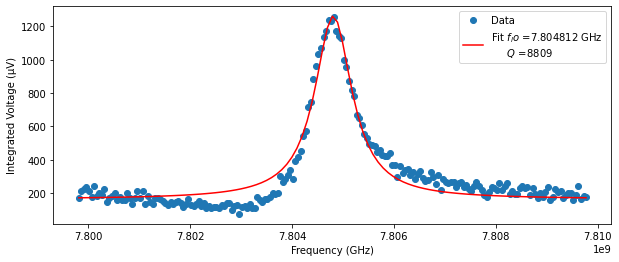

Starting iterative measurement...
100% completed | elapsed time:     76s | time left:      0s  
100% completed | elapsed time:     76s | time left:      0s  

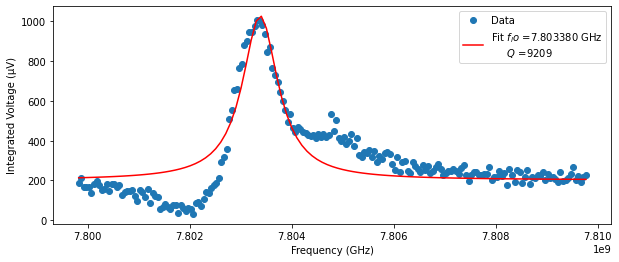


Resonator Frequency = 7824811566

Shifted Frequency = 7823379747

Dispersive Shift = -1431819


In [3]:
shifted_resonator_freq, dispersive_shift, peak_voltage, dataset = ds.run_dispersive_shift(qubit)

Spin Echo

In [ ]:
# Spin Echo: RX(pi/2) - wait t(rotates z) - RX(pi) - wait t(rotates z) - readout
dataset = ds.run_spin_echo(qubit)

In [ ]:
# Spin Echo 3 Pulses: RX(pi/2) - wait t(rotates z) - RX(pi) - wait t(rotates z) - RX(pi/2) - readout
dataset = ds.run_spin_echo_3pulses(qubit)

Qubit states classification

In [8]:
all_gnd_states, mean_gnd_states, all_exc_states, mean_exc_states = ds.calibrate_qubit_states(qubit)

Starting exc state calibration 0
Finished exc single shot execution  0
Starting exc state calibration 1
Finished exc single shot execution  1
Starting exc state calibration 2
Finished exc single shot execution  2
Starting exc state calibration 3
Finished exc single shot execution  3
Starting exc state calibration 4
Finished exc single shot execution  4
Starting exc state calibration 5
Finished exc single shot execution  5
Starting exc state calibration 6
Finished exc single shot execution  6
Starting exc state calibration 7
Finished exc single shot execution  7
Starting exc state calibration 8
Finished exc single shot execution  8
Starting exc state calibration 9
Finished exc single shot execution  9
Starting exc state calibration 10
Finished exc single shot execution  10
Starting exc state calibration 11
Finished exc single shot execution  11
Starting exc state calibration 12
Finished exc single shot execution  12
Starting exc state calibration 13
Finished exc single shot execution  1

In [10]:
mean_gnd_states, mean_exc_states
# TODO: Better print the results

((-6.182064043245226e-05+0.0011944253117085518j),
 (0.00015390240207881345+0.000538230934609144j))

[0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 

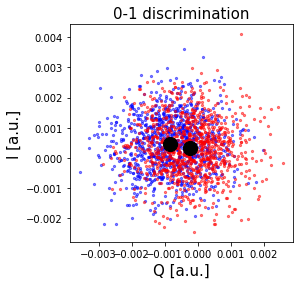

In [9]:
utils.plot_qubit_states(all_gnd_states, all_exc_states)

#Classify all points into 0 and 1
classified_gnd_results = []
for point in all_gnd_states: 
    classified_gnd_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

classified_exc_results = []
for point in all_exc_states:
    classified_exc_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

print(classified_gnd_results)
print(classified_exc_results)
# TODO: For consistency move plotting inside the function